# Telecom Churn Prediction

In [161]:
import pandas as pd

df = pd.read_csv('telecom_churn_data.csv')
df.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6  ...  sachet_3g_9  fb_user_6  fb_user_7  \
0            9/30/2014  197.385  ...            0        1.0        1.0   
1            9/30/2014   34.047  ...            0        NaN        1.0   
2            9/30/2014  167.690  ...            0        NaN        NaN   
3            9/30/2014  221.338  ...            0        NaN        NaN   
4            9/30/2014  261.636  ...            0        0.0        NaN   

   fb_user_8  fb_user_9   aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  sep_vbc_3g  
0        1.0        NaN   968        30.4         0.0      101.20        3.58  
1        1.0        NaN  1006         0.0         0.0        0.00        0.00  
2        NaN        1.0  1103         0.0         0.0        4.17        0.00  
3        NaN        NaN  2491         0.0         0.0        0.00        0.00  
4        NaN        NaN  1526         0.0         0.0        0.00        0.00  

[5 rows x 226 columns]

### Filter high value customers

In [162]:
df['tot_rech_amt_6_7'] = df['total_rech_amt_6'] + df['total_rech_amt_7']

value_threshold = df['tot_rech_amt_6_7'].quantile(0.7)
print(len(df))
df = df[df['tot_rech_amt_6_7'] >= value_threshold]
print(len(df))

99999
30011


## Tagging churners

In [163]:
def churn_tag(a, b, c, d):
    if a == 0 and b == 0 and c == 0 and d == 0:
        return 1
    else:
        return 0

df['Churn'] = df.apply(lambda x: churn_tag(x.total_ic_mou_9, x.total_og_mou_9, x.vol_2g_mb_9, x.vol_3g_mb_9), axis = 1)

### Check for class imbalance

In [164]:
from collections import Counter
print(Counter(df.Churn.tolist()))

Counter({0: 27418, 1: 2593})


### Drop Churn Phase attributes

In [165]:
for c in df.columns:
    if c[-2:] == '_9':
        df.drop([c], axis = 1, inplace = True)

### Drop columns with too many (more than 30%) null values

In [166]:
for c in df.columns:
    if df[c].isna().sum()/len(df) >= 0.3:
        df.drop([c], axis = 1, inplace = True)

In [167]:
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30011 entries, 7 to 99997
Data columns (total 144 columns):
 #    Column                Non-Null Count  Dtype  
---   ------                --------------  -----  
 0    mobile_number         30011 non-null  int64  
 1    circle_id             30011 non-null  int64  
 2    loc_og_t2o_mou        29897 non-null  float64
 3    std_og_t2o_mou        29897 non-null  float64
 4    loc_ic_t2o_mou        29897 non-null  float64
 5    last_date_of_month_6  30011 non-null  object 
 6    last_date_of_month_7  29980 non-null  object 
 7    last_date_of_month_8  29854 non-null  object 
 8    arpu_6                30011 non-null  float64
 9    arpu_7                30011 non-null  float64
 10   arpu_8                30011 non-null  float64
 11   onnet_mou_6           29695 non-null  float64
 12   onnet_mou_7           29708 non-null  float64
 13   onnet_mou_8           29073 non-null  float64
 14   offnet_mou_6          29695 non-null  float64
 15   

C:\Users\91984\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  """Entry point for launching an IPython kernel.


### Dropping redundant columns

In [168]:
df.drop(['mobile_number', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8'], axis = 1, inplace = True)

### Derive new features from dates

In [169]:
df.date_of_last_rech_6 = pd.to_datetime(df.date_of_last_rech_6)
df.date_of_last_rech_7 = pd.to_datetime(df.date_of_last_rech_7)
df.date_of_last_rech_8 = pd.to_datetime(df.date_of_last_rech_8)

df['day_of_last_rech_6'] = df.date_of_last_rech_6.dt.day
df['day_of_last_rech_7'] = df.date_of_last_rech_7.dt.day
df['day_of_last_rech_8'] = df.date_of_last_rech_8.dt.day

df.drop(['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8'], axis = 1, inplace = True)
df.head()

circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou    arpu_6  \
7         109             0.0             0.0             0.0  1069.180   
8         109             0.0             0.0             0.0   378.721   
13        109             0.0             0.0             0.0   492.846   
16        109             0.0             0.0             0.0   430.975   
17        109             0.0             0.0             0.0   690.008   

      arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  ...   aon  \
7   1349.850  3171.480        57.84        54.68        52.29  ...   802   
8    492.223   137.362       413.69       351.03        35.08  ...   315   
13   205.671   593.260       501.76       108.39       534.24  ...  2607   
16   299.869   187.894        50.51        74.01        70.61  ...   511   
17    18.980    25.499      1185.91         9.28         7.79  ...   667   

    aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  sep_vbc_3g  tot_rech_amt_6_7  Churn  \
7        57.74       19.38       18.74         0.0              2370      1   
8        21.03      910.65      122.16         0.0              1038      0   
13        0.00        0.00        0.00         0.0               760      0   
16        0.00        2.45       21.89         0.0               918      0   
17        0.00        0.00        0.00         0.0               816      0   

    day_of_last_rech_6  day_of_last_rech_7  day_of_last_rech_8  
7                 27.0                25.0                26.0  
8                 25.0                31.0                30.0  
13                20.0                22.0                30.0  
16                30.0                31.0                14.0  
17                30.0                30.0                25.0  

[5 rows x 140 columns]

In [170]:
df.drop(['circle_id'], axis = 1, inplace = True)
df.info(verbose=True, null_counts=True)

C:\Users\91984\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: null_counts is deprecated. Use show_counts instead
  


<class 'pandas.core.frame.DataFrame'>
Int64Index: 30011 entries, 7 to 99997
Data columns (total 139 columns):
 #    Column              Non-Null Count  Dtype  
---   ------              --------------  -----  
 0    loc_og_t2o_mou      29897 non-null  float64
 1    std_og_t2o_mou      29897 non-null  float64
 2    loc_ic_t2o_mou      29897 non-null  float64
 3    arpu_6              30011 non-null  float64
 4    arpu_7              30011 non-null  float64
 5    arpu_8              30011 non-null  float64
 6    onnet_mou_6         29695 non-null  float64
 7    onnet_mou_7         29708 non-null  float64
 8    onnet_mou_8         29073 non-null  float64
 9    offnet_mou_6        29695 non-null  float64
 10   offnet_mou_7        29708 non-null  float64
 11   offnet_mou_8        29073 non-null  float64
 12   roam_ic_mou_6       29695 non-null  float64
 13   roam_ic_mou_7       29708 non-null  float64
 14   roam_ic_mou_8       29073 non-null  float64
 15   roam_og_mou_6       29695 non-null

We have all numeric attributes. No need of categorical processing

In [171]:
y = df.Churn
df.drop(['Churn'], axis = 1, inplace = True)
X = df
X.head()


loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou    arpu_6    arpu_7  \
7              0.0             0.0             0.0  1069.180  1349.850   
8              0.0             0.0             0.0   378.721   492.223   
13             0.0             0.0             0.0   492.846   205.671   
16             0.0             0.0             0.0   430.975   299.869   
17             0.0             0.0             0.0   690.008    18.980   

      arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  ...  \
7   3171.480        57.84        54.68        52.29        453.43  ...   
8    137.362       413.69       351.03        35.08         94.66  ...   
13   593.260       501.76       108.39       534.24        413.31  ...   
16   187.894        50.51        74.01        70.61        296.29  ...   
17    25.499      1185.91         9.28         7.79         61.64  ...   

    sachet_3g_8   aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  sep_vbc_3g  \
7             0   802       57.74       19.38       18.74         0.0   
8             0   315       21.03      910.65      122.16         0.0   
13            0  2607        0.00        0.00        0.00         0.0   
16            0   511        0.00        2.45       21.89         0.0   
17            0   667        0.00        0.00        0.00         0.0   

    tot_rech_amt_6_7  day_of_last_rech_6  day_of_last_rech_7  \
7               2370                27.0                25.0   
8               1038                25.0                31.0   
13               760                20.0                22.0   
16               918                30.0                31.0   
17               816                30.0                30.0   

    day_of_last_rech_8  
7                 26.0  
8                 30.0  
13                30.0  
16                14.0  
17                25.0  

[5 rows x 138 columns]

## Correlation plot

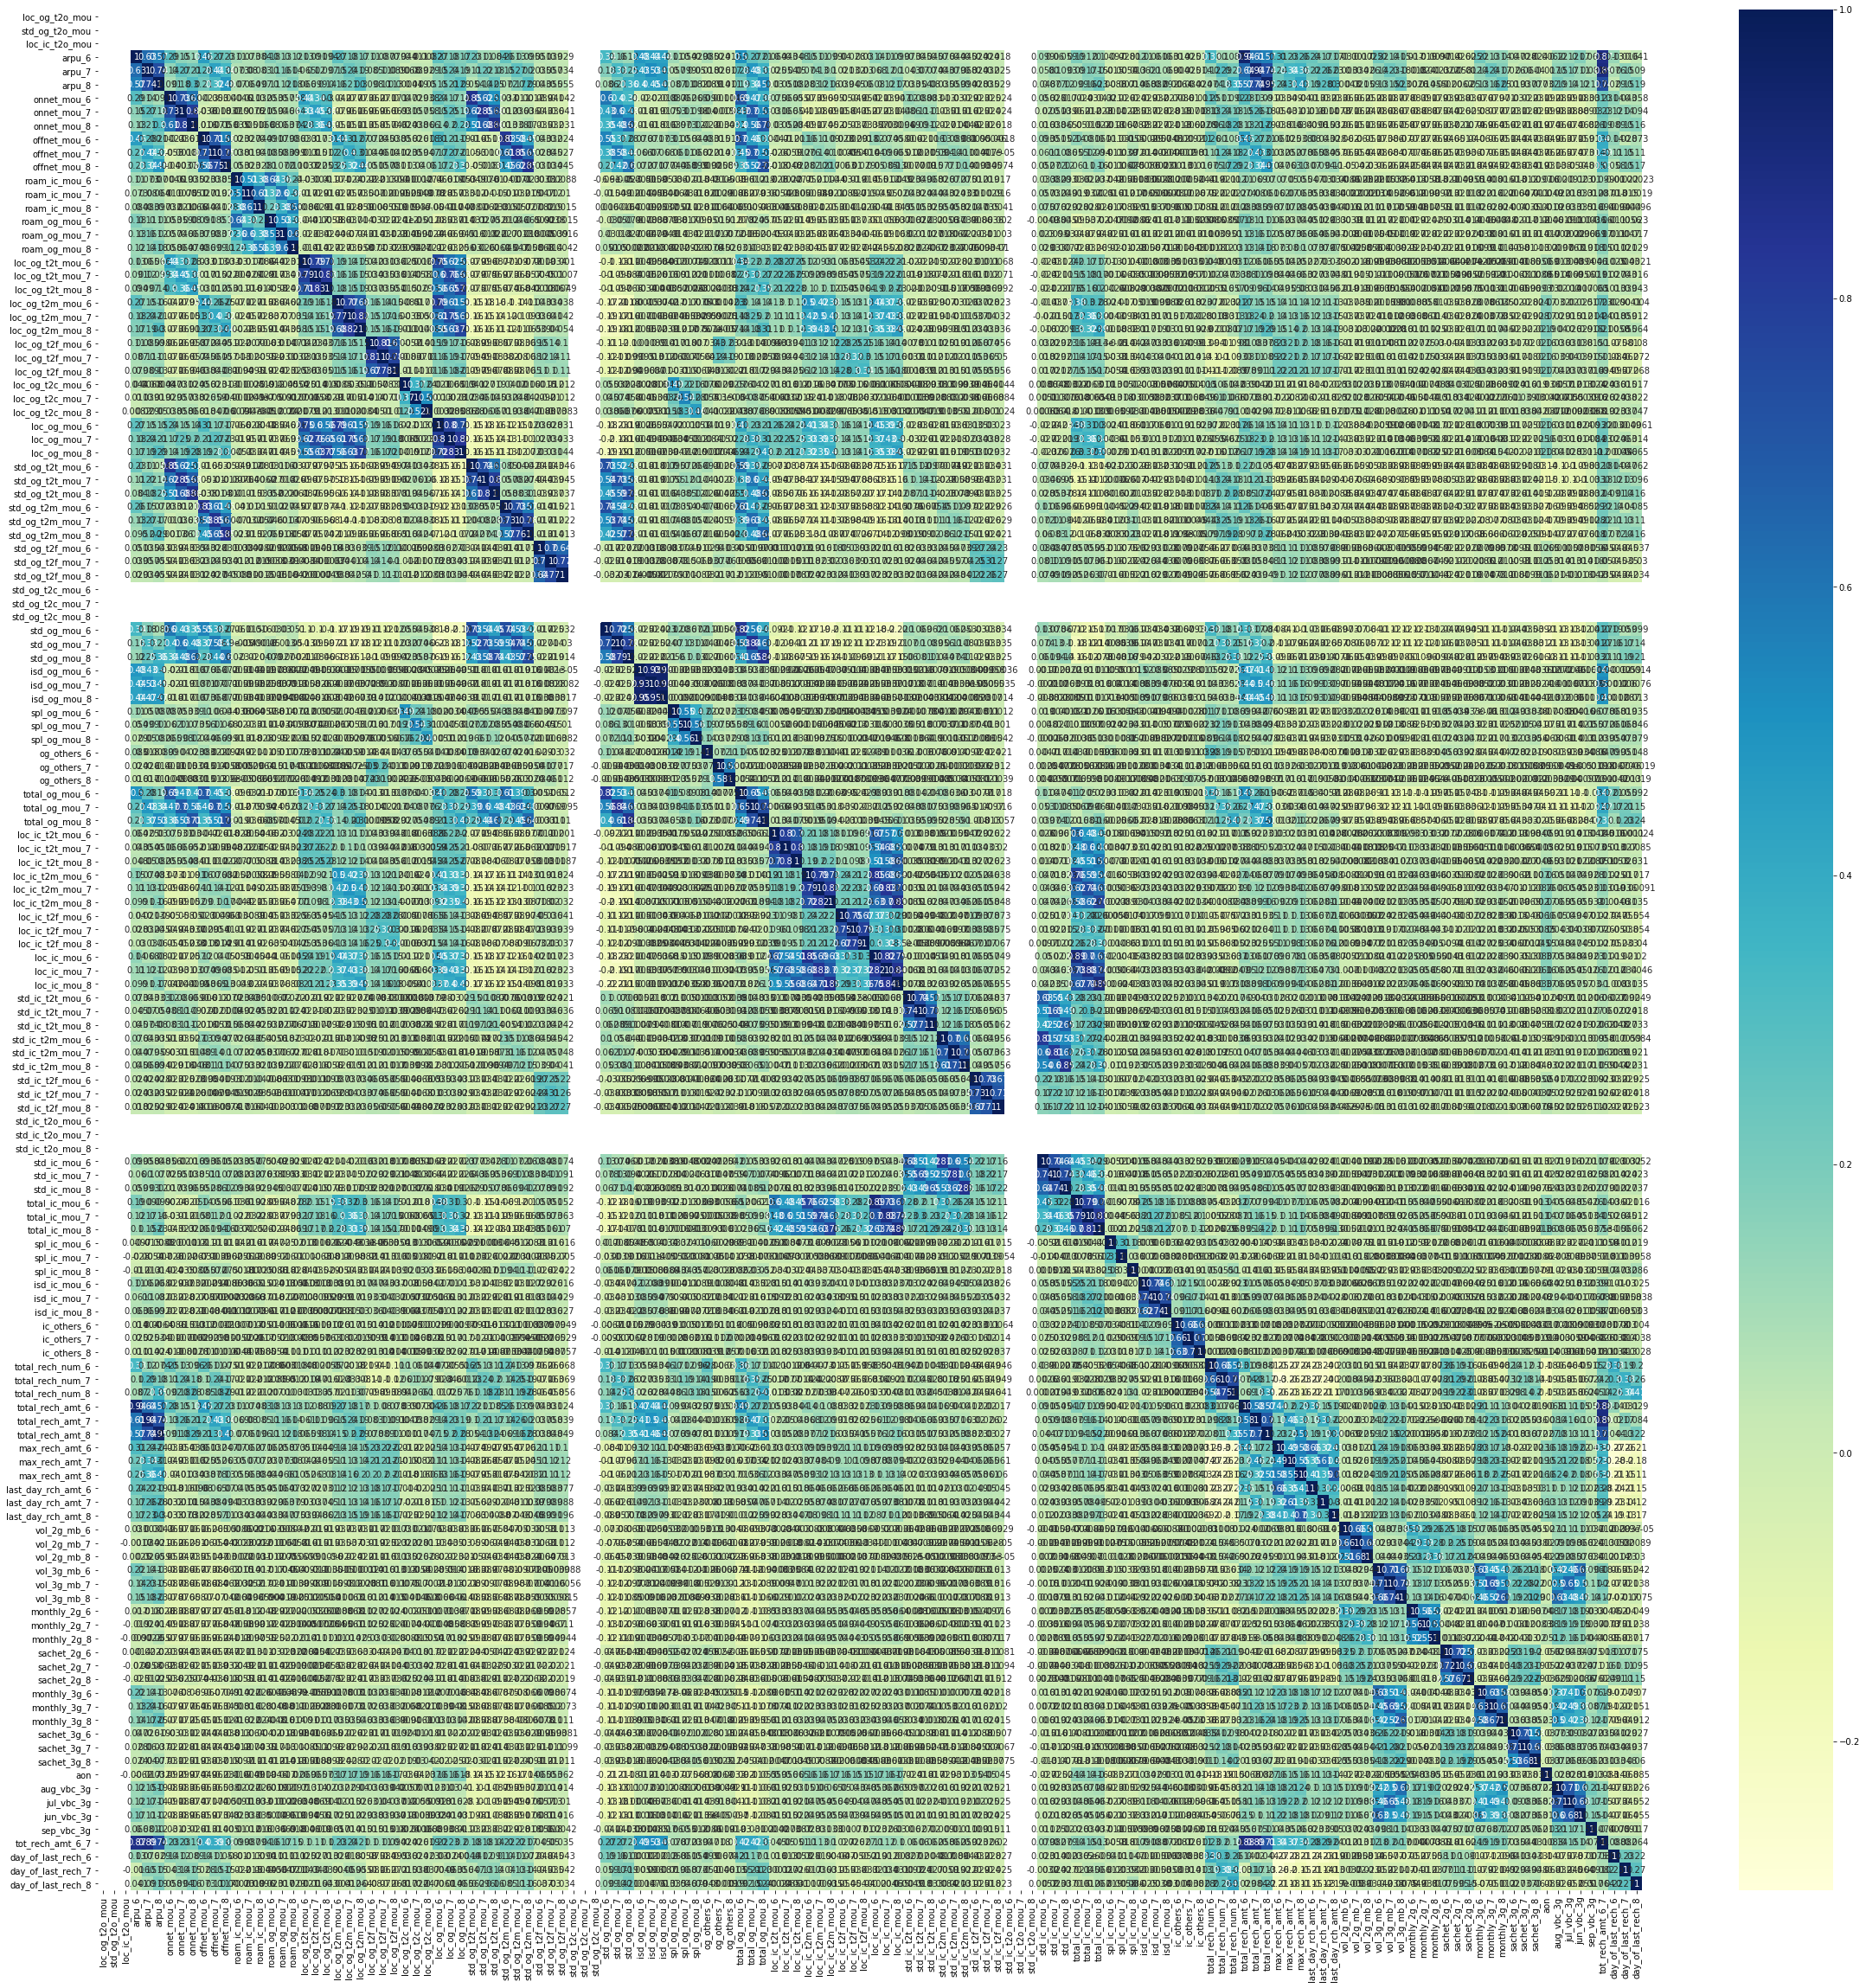

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure

figure(figsize=(40, 40))
corr = df.corr()
sns.heatmap(corr, cmap="YlGnBu", annot=True)
plt.show()

Not much to make out here, but we can see that there are a few dark spots indicating strong positive correlation between a few attributes. PCA can definitely help here

In [172]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size = 0.1, random_state = 100, stratify = y)

#### Scaling before PCA

In [173]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### Fit PCA to get features explaining 90% of the variannce

In [174]:
from sklearn.decomposition import PCA
import numpy as np
pca = PCA(0.9)
print(X_train.shape)
X_train = np.nan_to_num(X_train)
X_test = np.nan_to_num(X_test)
X_train = pca.fit_transform(X_train)
print(X_train.shape)
X_test = pca.transform(X_test)

(27009, 138)
(27009, 25)


### Handle class imbalance with oversampling using SMOTE

In [55]:
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state=42)
X_train_os, y_train_os = sm.fit_resample(X_train, y_train)
print(X_train_os.shape)

(49350, 25)


## Fit 2 models (Logistic regression and ExtraTreesClassifier). 

Since Churn rate is important for us, we will pick the model with the best true positive rate

We will first fit on oversampled data and then fit on original data

In [56]:
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state = 42)
from sklearn.ensemble import ExtraTreesClassifier
ec = ExtraTreesClassifier(n_estimators=100, random_state=42, bootstrap = True, max_samples = 0.25, n_jobs = -1)

logreg.fit(X_train_os, y_train_os)
ec.fit(X_train_os, y_train_os)

logreg_preds = logreg.predict(X_test)
ec_preds = ec.predict(X_test)

print('---Logistic Regression Result----')
print(classification_report(y_test, logreg_preds))
print('------\n')

print('---ExtraTrees Result----')
print(classification_report(y_test, ec_preds))
print('------\n')

---Logistic Regression Result----
              precision    recall  f1-score   support

           0       0.98      0.84      0.90      2743
           1       0.33      0.83      0.47       259

    accuracy                           0.84      3002
   macro avg       0.65      0.84      0.69      3002
weighted avg       0.93      0.84      0.87      3002

------

---ExtraTrees Result----
              precision    recall  f1-score   support

           0       0.97      0.90      0.94      2743
           1       0.41      0.71      0.52       259

    accuracy                           0.89      3002
   macro avg       0.69      0.81      0.73      3002
weighted avg       0.92      0.89      0.90      3002

------



Extra Trees has performed better in predicting Churn. Let us now see how the models perform on the original unadjusted data

In [57]:
logreg.fit(X_train, y_train)
ec.fit(X_train, y_train)

logreg_preds = logreg.predict(X_test)
ec_preds = ec.predict(X_test)

print('---Logistic Regression Result----')
print(classification_report(y_test, logreg_preds))
print('------\n')

print('---ExtraTrees Result----')
print(classification_report(y_test, ec_preds))
print('------\n')

---Logistic Regression Result----
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      2743
           1       0.64      0.22      0.33       259

    accuracy                           0.92      3002
   macro avg       0.79      0.60      0.64      3002
weighted avg       0.91      0.92      0.90      3002

------

---ExtraTrees Result----
              precision    recall  f1-score   support

           0       0.92      1.00      0.96      2743
           1       0.71      0.12      0.21       259

    accuracy                           0.92      3002
   macro avg       0.82      0.56      0.58      3002
weighted avg       0.90      0.92      0.89      3002

------



While the precision is better in this model, the recall is very poor. This means, the unadjusted model will miss to predict churners more times than the class imbalance adjusted model. So the recommendation is to use the Extra Trees model trained on SMOTE adjusted training data

# Modeling for Explainability

We will train another logistic regression model using stats package to identify features that are important. To do this, we will first reduce the dimensionality of the original dataset to 25 using RFE. After this, we will run the stats model logistic regression.

We reduce the dimensionality to 25, for 2 reasons:

i. It is easier to analyse 25 attributes than 138 attributes

ii. PCA reduced the feature dimensions from 138 to 25 with 90% variance explanation. While this is not a statisitically rigorous method to decide on feature dimensions, it is still a good starting point

In [175]:
from sklearn.feature_selection import RFE
lr = LogisticRegression(random_state = 42)

selector = RFE(lr, n_features_to_select=25, step=1)
X_2 = df
y_2 = y
selector.fit(np.nan_to_num(scaler.transform(X_2.values)), y_2)

C:\Users\91984\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\91984\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\Users\91984\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\91984\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

RFE(estimator=LogisticRegression(random_state=42), n_features_to_select=25)

In [177]:
X_2 = df
X_2[X_2.columns] = scaler.transform(X_2)
for c,s in zip(X_2.columns, selector.support_):
    if not s:
        df.drop([c], axis = 1, inplace = True)

X_2.head()

arpu_6    arpu_8  onnet_mou_8  offnet_mou_8  roam_og_mou_7  \
7   0.187525  0.203406     0.004863      0.023267       0.004477   
8   0.148618  0.053512     0.003262      0.009743       0.000000   
13  0.155049  0.076034     0.049685      0.034443       0.012539   
16  0.151562  0.056008     0.006567      0.011620       0.006309   
17  0.166159  0.047985     0.000724      0.000396       0.003008   

    loc_og_t2m_mou_8  loc_og_mou_8  std_og_mou_7  std_og_mou_8  \
7           0.032709      0.023170      0.006870      0.005568   
8           0.010187      0.005710      0.013119      0.007030   
13          0.059351      0.032065      0.012703      0.046865   
16          0.025856      0.018653      0.006134      0.001540   
17          0.000000      0.000000      0.000074      0.000000   

    total_og_mou_8  ...  total_rech_num_8  total_rech_amt_6  total_rech_amt_8  \
7         0.024935  ...          0.035714          0.085405          0.178290   
8         0.012217  ...          0.071429          0.023622          0.005881   
13        0.072296  ...          0.056122          0.027405          0.035138   
16        0.016619  ...          0.010204          0.030811          0.007841   
17        0.000000  ...          0.020408          0.044108          0.001470   

    max_rech_amt_8  last_day_rch_amt_8  vol_3g_mb_8  monthly_2g_8  \
7         0.355136            0.175096     0.000000           0.0   
8         0.006743            0.002248     0.000398           0.0   
13        0.029220            0.000000     0.000000           0.0   
16        0.029220            0.029220     0.000000           0.0   
17        0.006743            0.000000     0.000000           0.0   

    sachet_2g_8  monthly_3g_8  tot_rech_amt_6_7  
7      0.000000           0.0          0.044420  
8      0.068182           0.0          0.008188  
13     0.068182           0.0          0.000626  
16     0.000000           0.0          0.004923  
17     0.000000           0.0          0.002149  

[5 rows x 25 columns]

In [178]:
X_2['Churn'] = y_2
X_2.dropna(inplace = True)
y_2 = X_2['Churn']
X_2.drop(['Churn'], axis = 1, inplace = True)

## Statsmodel logistic regression

In [179]:
import statsmodels.api as sm
logm1 = sm.GLM(y_2,(sm.add_constant(X_2)), family = sm.families.Binomial())
logm1.fit().summary()

C:\Users\91984\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                29012
Model:                            GLM   Df Residuals:                    28986
Model Family:                Binomial   Df Model:                           25
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -5135.2
Date:                Tue, 23 Nov 2021   Deviance:                       10270.
Time:                        21:21:22   Pearson chi2:                 2.94e+10
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.8152      0.554     -1.470      0.142      -1.902       0.272
arpu_6                -1.2709      3.416     -0.372      0.710      -7.966       5.424
arpu_8                -2.3186      5.163     -0.449      0.653     -12.439       7.801
onnet_mou_8            9.8818      2.789      3.543      0.000       4.415      15.348
offnet_mou_8          11.9824      3.590      3.338      0.001       4.946      19.019
roam_og_mou_7          3.9259      0.682      5.758      0.000       2.590       5.262
loc_og_t2m_mou_8      -2.9467      3.407     -0.865      0.387      -9.625       3.731
loc_og_mou_8         -12.6753     13.606     -0.932      0.352     -39.342      13.991
std_og_mou_7           5.4813      0.724      7.569      0.000       4.062       6.901
std_og_mou_8          -5.0517     16.083     -0.314      0.753     -36.574      26.471
total_og_mou_8       -21.3406     15.726     -1.357      0.175     -52.162       9.481
loc_ic_t2m_mou_8     -10.9640      5.570     -1.968      0.049     -21.881      -0.047
loc_ic_mou_8          -8.2247      4.532     -1.815      0.070     -17.108       0.659
total_ic_mou_6         5.3220      0.788      6.753      0.000       3.777       6.867
total_ic_mou_8       -12.4910      2.355     -5.304      0.000     -17.107      -7.875
spl_ic_mou_8         -17.6675      2.765     -6.390      0.000     -23.087     -12.248
total_rech_num_8      -3.6295      0.980     -3.705      0.000      -5.550      -1.709
total_rech_amt_6      -3.4562      2.961     -1.167      0.243      -9.259       2.347
total_rech_amt_8     -12.2874      3.852     -3.190      0.001     -19.837      -4.738
max_rech_amt_8         4.3741      1.101      3.972      0.000       2.216       6.532
last_day_rch_amt_8   -17.5988      1.775     -9.917      0.000     -21.077     -14.120
vol_3g_mb_8           -6.3489      3.105     -2.044      0.041     -12.435      -0.262
monthly_2g_8          -6.8842      0.866     -7.945      0.000      -8.582      -5.186
sachet_2g_8           -6.4752      1.191     -5.438      0.000      -8.809      -4.141
monthly_3g_8         -13.5351      2.456     -5.512      0.000     -18.348      -8.722
tot_rech_amt_6_7      19.5832      3.397      5.764      0.000      12.925      26.242
======================================================================================
"""

### Dropping std_og_mou_8 which has the highest p value

In [180]:
X_2.drop(['std_og_mou_8'], axis = 1, inplace = True)
logm2 = sm.GLM(y_2,(sm.add_constant(X_2)), family = sm.families.Binomial())
logm2.fit().summary()

C:\Users\91984\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                29012
Model:                            GLM   Df Residuals:                    28987
Model Family:                Binomial   Df Model:                           24
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -5135.3
Date:                Tue, 23 Nov 2021   Deviance:                       10271.
Time:                        21:21:42   Pearson chi2:                 2.72e+10
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.8143      0.554     -1.469      0.142      -1.901       0.272
arpu_6                -1.2821      3.414     -0.376      0.707      -7.973       5.409
arpu_8                -2.2516      5.155     -0.437      0.662     -12.356       7.852
onnet_mou_8            9.6547      2.696      3.581      0.000       4.370      14.939
offnet_mou_8          11.6996      3.478      3.364      0.001       4.884      18.516
roam_og_mou_7          3.9042      0.678      5.756      0.000       2.575       5.234
loc_og_t2m_mou_8      -2.9949      3.408     -0.879      0.379      -9.674       3.684
loc_og_mou_8          -8.7303      5.243     -1.665      0.096     -19.007       1.547
std_og_mou_7           5.4585      0.720      7.579      0.000       4.047       6.870
total_og_mou_8       -26.1813      3.177     -8.242      0.000     -32.408     -19.955
loc_ic_t2m_mou_8     -10.9525      5.573     -1.965      0.049     -21.875      -0.030
loc_ic_mou_8          -8.2538      4.533     -1.821      0.069     -17.138       0.631
total_ic_mou_6         5.3145      0.788      6.746      0.000       3.770       6.859
total_ic_mou_8       -12.4756      2.353     -5.301      0.000     -17.088      -7.863
spl_ic_mou_8         -17.6462      2.764     -6.384      0.000     -23.064     -12.228
total_rech_num_8      -3.6758      0.971     -3.785      0.000      -5.579      -1.772
total_rech_amt_6      -3.4931      2.958     -1.181      0.238      -9.290       2.304
total_rech_amt_8     -11.8871      3.651     -3.255      0.001     -19.044      -4.730
max_rech_amt_8         4.3004      1.078      3.989      0.000       2.187       6.413
last_day_rch_amt_8   -17.6416      1.773     -9.950      0.000     -21.117     -14.166
vol_3g_mb_8           -6.3852      3.104     -2.057      0.040     -12.470      -0.301
monthly_2g_8          -6.8944      0.866     -7.963      0.000      -8.591      -5.197
sachet_2g_8           -6.4724      1.191     -5.436      0.000      -8.806      -4.139
monthly_3g_8         -13.5855      2.451     -5.544      0.000     -18.389      -8.782
tot_rech_amt_6_7      19.7277      3.365      5.862      0.000      13.132      26.323
======================================================================================
"""

### Dropping arpu_6

In [181]:
X_2.drop(['arpu_6'], axis = 1, inplace = True)
logm3 = sm.GLM(y_2,(sm.add_constant(X_2)), family = sm.families.Binomial())
logm3.fit().summary()

C:\Users\91984\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                29012
Model:                            GLM   Df Residuals:                    28988
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -5135.3
Date:                Tue, 23 Nov 2021   Deviance:                       10271.
Time:                        21:21:56   Pearson chi2:                 2.68e+10
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.9931      0.282     -3.525      0.000      -1.545      -0.441
arpu_8                -2.0867      5.138     -0.406      0.685     -12.156       7.983
onnet_mou_8            9.6437      2.700      3.572      0.000       4.352      14.935
offnet_mou_8          11.6797      3.480      3.356      0.001       4.859      18.501
roam_og_mou_7          3.9139      0.678      5.777      0.000       2.586       5.242
loc_og_t2m_mou_8      -2.9906      3.407     -0.878      0.380      -9.669       3.687
loc_og_mou_8          -8.7092      5.243     -1.661      0.097     -18.985       1.566
std_og_mou_7           5.4819      0.717      7.642      0.000       4.076       6.888
total_og_mou_8       -26.1946      3.180     -8.237      0.000     -32.427     -19.962
loc_ic_t2m_mou_8     -10.9530      5.572     -1.966      0.049     -21.873      -0.033
loc_ic_mou_8          -8.2348      4.532     -1.817      0.069     -17.117       0.647
total_ic_mou_6         5.2882      0.785      6.740      0.000       3.750       6.826
total_ic_mou_8       -12.4680      2.353     -5.298      0.000     -17.080      -7.856
spl_ic_mou_8         -17.6557      2.764     -6.387      0.000     -23.074     -12.238
total_rech_num_8      -3.6982      0.970     -3.811      0.000      -5.600      -1.796
total_rech_amt_6      -4.2923      2.069     -2.075      0.038      -8.347      -0.238
total_rech_amt_8     -11.9340      3.658     -3.262      0.001     -19.103      -4.764
max_rech_amt_8         4.3322      1.077      4.024      0.000       2.222       6.442
last_day_rch_amt_8   -17.6599      1.780     -9.922      0.000     -21.148     -14.171
vol_3g_mb_8           -6.3968      3.103     -2.062      0.039     -12.478      -0.315
monthly_2g_8          -6.9030      0.866     -7.975      0.000      -8.599      -5.207
sachet_2g_8           -6.4724      1.191     -5.435      0.000      -8.806      -4.138
monthly_3g_8         -13.6173      2.450     -5.559      0.000     -18.419      -8.816
tot_rech_amt_6_7      19.3883      3.240      5.984      0.000      13.038      25.739
======================================================================================
"""

### Dropping arpu_8

In [182]:
X_2.drop(['arpu_8'], axis = 1, inplace = True)
logm4 = sm.GLM(y_2,(sm.add_constant(X_2)), family = sm.families.Binomial())
logm4.fit().summary()

C:\Users\91984\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                29012
Model:                            GLM   Df Residuals:                    28989
Model Family:                Binomial   Df Model:                           22
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -5135.4
Date:                Tue, 23 Nov 2021   Deviance:                       10271.
Time:                        21:22:04   Pearson chi2:                 2.32e+10
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.1034      0.075    -14.721      0.000      -1.250      -0.956
onnet_mou_8            9.3549      2.607      3.589      0.000       4.246      14.464
offnet_mou_8          11.2733      3.336      3.380      0.001       4.736      17.811
roam_og_mou_7          3.9534      0.670      5.897      0.000       2.639       5.268
loc_og_t2m_mou_8      -3.0524      3.411     -0.895      0.371      -9.737       3.632
loc_og_mou_8          -8.6588      5.253     -1.649      0.099     -18.954       1.636
std_og_mou_7           5.5803      0.675      8.264      0.000       4.257       6.904
total_og_mou_8       -26.0313      3.156     -8.247      0.000     -32.218     -19.845
loc_ic_t2m_mou_8     -10.9068      5.572     -1.958      0.050     -21.827       0.014
loc_ic_mou_8          -8.2007      4.534     -1.809      0.070     -17.087       0.685
total_ic_mou_6         5.3100      0.783      6.785      0.000       3.776       6.844
total_ic_mou_8       -12.5353      2.350     -5.334      0.000     -17.141      -7.929
spl_ic_mou_8         -17.6483      2.764     -6.385      0.000     -23.065     -12.231
total_rech_num_8      -3.6881      0.970     -3.803      0.000      -5.589      -1.788
total_rech_amt_6      -4.0255      1.958     -2.056      0.040      -7.864      -0.188
total_rech_amt_8     -13.1407      2.136     -6.152      0.000     -17.327      -8.954
max_rech_amt_8         4.3702      1.073      4.071      0.000       2.266       6.474
last_day_rch_amt_8   -17.6333      1.775     -9.932      0.000     -21.113     -14.154
vol_3g_mb_8           -6.4218      3.103     -2.070      0.038     -12.503      -0.341
monthly_2g_8          -6.9163      0.865     -7.997      0.000      -8.611      -5.221
sachet_2g_8           -6.4699      1.190     -5.435      0.000      -8.803      -4.137
monthly_3g_8         -13.6744      2.445     -5.592      0.000     -18.467      -8.882
tot_rech_amt_6_7      18.7674      2.854      6.576      0.000      13.174      24.361
======================================================================================
"""

## VIF analysis for multi collinearity

In [183]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_2.columns
vif['VIF'] = [variance_inflation_factor(X_2.values, i) for i in range(X_2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
6       total_og_mou_8  121.28
1         offnet_mou_8   55.22
0          onnet_mou_8   44.38
8         loc_ic_mou_8   12.30
10      total_ic_mou_8    9.82
14    total_rech_amt_8    9.65
13    total_rech_amt_6    8.69
21    tot_rech_amt_6_7    8.04
4         loc_og_mou_8    6.55
7     loc_ic_t2m_mou_8    6.14
3     loc_og_t2m_mou_8    5.57
15      max_rech_amt_8    4.57
5         std_og_mou_7    4.32
9       total_ic_mou_6    3.97
12    total_rech_num_8    3.39
16  last_day_rch_amt_8    2.87
17         vol_3g_mb_8    2.30
20        monthly_3g_8    2.23
2        roam_og_mou_7    1.71
19         sachet_2g_8    1.28
18        monthly_2g_8    1.23
11        spl_ic_mou_8    1.08

### Dropping total_og_mou_8

In [184]:
X_2.drop(['total_og_mou_8'], axis = 1, inplace = True)
logm5 = sm.GLM(y_2,(sm.add_constant(X_2)), family = sm.families.Binomial())
logm5.fit().summary()

C:\Users\91984\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                29012
Model:                            GLM   Df Residuals:                    28990
Model Family:                Binomial   Df Model:                           21
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -5165.3
Date:                Tue, 23 Nov 2021   Deviance:                       10331.
Time:                        21:22:31   Pearson chi2:                 3.88e+10
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.1153      0.075    -14.880      0.000      -1.262      -0.968
onnet_mou_8          -10.0457      1.225     -8.202      0.000     -12.446      -7.645
offnet_mou_8         -12.7164      1.708     -7.447      0.000     -16.063      -9.370
roam_og_mou_7          7.0524      0.548     12.880      0.000       5.979       8.126
loc_og_t2m_mou_8      -3.8026      3.395     -1.120      0.263     -10.457       2.852
loc_og_mou_8          -9.0199      5.213     -1.730      0.084     -19.238       1.198
std_og_mou_7           5.6233      0.671      8.376      0.000       4.307       6.939
loc_ic_t2m_mou_8     -11.3954      5.668     -2.011      0.044     -22.504      -0.287
loc_ic_mou_8          -7.8464      4.630     -1.695      0.090     -16.920       1.228
total_ic_mou_6         6.0818      0.782      7.779      0.000       4.550       7.614
total_ic_mou_8       -14.4263      2.409     -5.988      0.000     -19.148      -9.704
spl_ic_mou_8         -18.3469      2.774     -6.613      0.000     -23.784     -12.910
total_rech_num_8      -3.8167      0.946     -4.036      0.000      -5.670      -1.963
total_rech_amt_6      -3.9538      1.961     -2.016      0.044      -7.797      -0.110
total_rech_amt_8     -11.4632      1.992     -5.755      0.000     -15.367      -7.559
max_rech_amt_8         4.4938      1.057      4.252      0.000       2.423       6.565
last_day_rch_amt_8   -16.7860      1.787     -9.394      0.000     -20.288     -13.284
vol_3g_mb_8           -6.9732      3.190     -2.186      0.029     -13.225      -0.721
monthly_2g_8          -6.8041      0.864     -7.874      0.000      -8.498      -5.110
sachet_2g_8           -6.2995      1.181     -5.334      0.000      -8.614      -3.985
monthly_3g_8         -13.0405      2.451     -5.320      0.000     -17.845      -8.236
tot_rech_amt_6_7      17.4110      2.860      6.087      0.000      11.805      23.017
======================================================================================
"""

In [185]:
vif = pd.DataFrame()
vif['Features'] = X_2.columns
vif['VIF'] = [variance_inflation_factor(X_2.values, i) for i in range(X_2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
7         loc_ic_mou_8  12.30
9       total_ic_mou_8   9.77
13    total_rech_amt_8   9.55
12    total_rech_amt_6   8.69
20    tot_rech_amt_6_7   8.01
4         loc_og_mou_8   6.55
6     loc_ic_t2m_mou_8   6.14
3     loc_og_t2m_mou_8   5.56
1         offnet_mou_8   4.70
14      max_rech_amt_8   4.57
5         std_og_mou_7   4.32
8       total_ic_mou_6   3.95
0          onnet_mou_8   3.85
11    total_rech_num_8   3.39
15  last_day_rch_amt_8   2.87
16         vol_3g_mb_8   2.30
19        monthly_3g_8   2.23
18         sachet_2g_8   1.28
17        monthly_2g_8   1.23
2        roam_og_mou_7   1.15
10        spl_ic_mou_8   1.08

### Dropping tot_rech_amt_6_7

In [186]:
X_2.drop(['tot_rech_amt_6_7'], axis = 1, inplace = True)
logm6 = sm.GLM(y_2,(sm.add_constant(X_2)), family = sm.families.Binomial())
logm6.fit().summary()

C:\Users\91984\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                29012
Model:                            GLM   Df Residuals:                    28991
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -5185.5
Date:                Tue, 23 Nov 2021   Deviance:                       10371.
Time:                        21:23:13   Pearson chi2:                 2.00e+10
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.3300      0.066    -20.021      0.000      -1.460      -1.200
onnet_mou_8          -12.0298      1.193    -10.085      0.000     -14.368      -9.692
offnet_mou_8         -15.0486      1.672     -9.002      0.000     -18.325     -11.772
roam_og_mou_7          7.9428      0.524     15.166      0.000       6.916       8.969
loc_og_t2m_mou_8      -3.8036      3.364     -1.131      0.258     -10.396       2.789
loc_og_mou_8          -6.3917      5.139     -1.244      0.214     -16.463       3.680
std_og_mou_7           7.6680      0.583     13.143      0.000       6.525       8.812
loc_ic_t2m_mou_8     -11.4681      5.627     -2.038      0.042     -22.498      -0.439
loc_ic_mou_8          -8.2808      4.576     -1.810      0.070     -17.250       0.688
total_ic_mou_6         6.1406      0.782      7.857      0.000       4.609       7.672
total_ic_mou_8       -13.8240      2.367     -5.839      0.000     -18.464      -9.184
spl_ic_mou_8         -18.7208      2.779     -6.736      0.000     -24.168     -13.274
total_rech_num_8      -4.7821      0.957     -4.998      0.000      -6.657      -2.907
total_rech_amt_6       5.4030      1.193      4.529      0.000       3.065       7.741
total_rech_amt_8      -3.2425      1.531     -2.119      0.034      -6.242      -0.243
max_rech_amt_8         3.6596      1.003      3.648      0.000       1.694       5.626
last_day_rch_amt_8   -17.9832      1.824     -9.858      0.000     -21.559     -14.408
vol_3g_mb_8           -6.3368      3.169     -2.000      0.046     -12.547      -0.127
monthly_2g_8          -6.8893      0.861     -8.001      0.000      -8.577      -5.202
sachet_2g_8           -6.3564      1.183     -5.371      0.000      -8.676      -4.037
monthly_3g_8         -12.9783      2.425     -5.351      0.000     -17.732      -8.224
======================================================================================
"""

In [187]:
vif = pd.DataFrame()
vif['Features'] = X_2.columns
vif['VIF'] = [variance_inflation_factor(X_2.values, i) for i in range(X_2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
7         loc_ic_mou_8  12.30
9       total_ic_mou_8   9.77
13    total_rech_amt_8   6.71
4         loc_og_mou_8   6.47
6     loc_ic_t2m_mou_8   6.14
3     loc_og_t2m_mou_8   5.55
1         offnet_mou_8   4.57
12    total_rech_amt_6   4.38
14      max_rech_amt_8   4.37
5         std_og_mou_7   4.10
8       total_ic_mou_6   3.92
0          onnet_mou_8   3.71
11    total_rech_num_8   2.97
15  last_day_rch_amt_8   2.86
16         vol_3g_mb_8   2.29
19        monthly_3g_8   2.22
18         sachet_2g_8   1.28
17        monthly_2g_8   1.20
2        roam_og_mou_7   1.13
10        spl_ic_mou_8   1.07

### Dropping loc_ic_mou_8, loc_og_mou_8, and loc_og_t2m_mou_8 as they have both high p values and VIF.

In [188]:
X_2.drop(['loc_ic_mou_8', 'loc_og_mou_8', 'loc_og_t2m_mou_8'], axis = 1, inplace = True)
logm7 = sm.GLM(y_2,(sm.add_constant(X_2)), family = sm.families.Binomial())
logm7.fit().summary()

C:\Users\91984\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                29012
Model:                            GLM   Df Residuals:                    28994
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -5197.0
Date:                Tue, 23 Nov 2021   Deviance:                       10394.
Time:                        21:24:18   Pearson chi2:                 1.26e+10
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.3611      0.066    -20.547      0.000      -1.491      -1.231
onnet_mou_8          -13.1524      1.161    -11.327      0.000     -15.428     -10.877
offnet_mou_8         -17.2892      1.616    -10.697      0.000     -20.457     -14.121
roam_og_mou_7          8.2752      0.521     15.880      0.000       7.254       9.297
std_og_mou_7           8.5052      0.558     15.245      0.000       7.412       9.599
loc_ic_t2m_mou_8     -24.4133      3.622     -6.741      0.000     -31.512     -17.315
total_ic_mou_6         6.2277      0.782      7.965      0.000       4.695       7.760
total_ic_mou_8       -16.9039      2.074     -8.149      0.000     -20.970     -12.838
spl_ic_mou_8         -18.2660      2.772     -6.589      0.000     -23.699     -12.833
total_rech_num_8      -4.5699      0.959     -4.763      0.000      -6.450      -2.689
total_rech_amt_6       5.1293      1.195      4.293      0.000       2.787       7.471
total_rech_amt_8      -2.7126      1.595     -1.700      0.089      -5.840       0.414
max_rech_amt_8         3.4110      1.002      3.405      0.001       1.447       5.374
last_day_rch_amt_8   -18.5126      1.832    -10.105      0.000     -22.103     -14.922
vol_3g_mb_8           -6.1858      3.171     -1.951      0.051     -12.401       0.029
monthly_2g_8          -6.8902      0.861     -8.006      0.000      -8.577      -5.203
sachet_2g_8           -6.5467      1.191     -5.497      0.000      -8.881      -4.213
monthly_3g_8         -12.8676      2.423     -5.311      0.000     -17.616      -8.119
======================================================================================
"""

In [189]:
vif = pd.DataFrame()
vif['Features'] = X_2.columns
vif['VIF'] = [variance_inflation_factor(X_2.values, i) for i in range(X_2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
10    total_rech_amt_8  6.50
6       total_ic_mou_8  6.06
11      max_rech_amt_8  4.35
9     total_rech_amt_6  4.17
5       total_ic_mou_6  3.90
4     loc_ic_t2m_mou_8  3.80
1         offnet_mou_8  3.08
8     total_rech_num_8  2.95
12  last_day_rch_amt_8  2.85
3         std_og_mou_7  2.72
13         vol_3g_mb_8  2.28
0          onnet_mou_8  2.22
16        monthly_3g_8  2.22
15         sachet_2g_8  1.28
14        monthly_2g_8  1.20
2        roam_og_mou_7  1.10
7         spl_ic_mou_8  1.07

### Dropping total_rech_amt_8. We will not drop any more columns

In [191]:
X_2.drop(['total_rech_amt_8'], axis = 1, inplace = True)
logm8 = sm.GLM(y_2,(sm.add_constant(X_2)), family = sm.families.Binomial())
logm8.fit().summary()

C:\Users\91984\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                29012
Model:                            GLM   Df Residuals:                    28995
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -5198.6
Date:                Tue, 23 Nov 2021   Deviance:                       10397.
Time:                        21:26:19   Pearson chi2:                 9.05e+09
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.3089      0.060    -21.770      0.000      -1.427      -1.191
onnet_mou_8          -13.6058      1.134    -11.995      0.000     -15.829     -11.383
offnet_mou_8         -18.1229      1.558    -11.635      0.000     -21.176     -15.070
roam_og_mou_7          8.3223      0.519     16.050      0.000       7.306       9.339
std_og_mou_7           8.7459      0.544     16.069      0.000       7.679       9.813
loc_ic_t2m_mou_8     -23.9455      3.617     -6.621      0.000     -31.034     -16.857
total_ic_mou_6         6.4353      0.775      8.306      0.000       4.917       7.954
total_ic_mou_8       -17.2514      2.076     -8.310      0.000     -21.320     -13.182
spl_ic_mou_8         -18.1865      2.770     -6.565      0.000     -23.616     -12.757
total_rech_num_8      -5.0480      0.924     -5.462      0.000      -6.859      -3.237
total_rech_amt_6       3.5643      0.859      4.150      0.000       1.881       5.248
max_rech_amt_8         2.7518      0.942      2.921      0.003       0.906       4.598
last_day_rch_amt_8   -18.8575      1.832    -10.295      0.000     -22.447     -15.268
vol_3g_mb_8           -6.0773      3.162     -1.922      0.055     -12.276       0.121
monthly_2g_8          -6.9423      0.860     -8.076      0.000      -8.627      -5.257
sachet_2g_8           -6.5189      1.190     -5.480      0.000      -8.850      -4.187
monthly_3g_8         -12.9199      2.412     -5.357      0.000     -17.647      -8.193
======================================================================================
"""

In [192]:
vif = pd.DataFrame()
vif['Features'] = X_2.columns
vif['VIF'] = [variance_inflation_factor(X_2.values, i) for i in range(X_2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
6       total_ic_mou_8  6.02
10      max_rech_amt_8  4.06
4     loc_ic_t2m_mou_8  3.79
5       total_ic_mou_6  3.79
9     total_rech_amt_6  3.16
11  last_day_rch_amt_8  2.83
8     total_rech_num_8  2.73
1         offnet_mou_8  2.63
3         std_og_mou_7  2.62
12         vol_3g_mb_8  2.28
15        monthly_3g_8  2.18
0          onnet_mou_8  2.05
14         sachet_2g_8  1.28
13        monthly_2g_8  1.20
2        roam_og_mou_7  1.10
7         spl_ic_mou_8  1.07

## Result

In [193]:
result = logm8.fit()
print(result.params)

const                 -1.308885
onnet_mou_8          -13.605770
offnet_mou_8         -18.122862
roam_og_mou_7          8.322324
std_og_mou_7           8.745875
loc_ic_t2m_mou_8     -23.945521
total_ic_mou_6         6.435327
total_ic_mou_8       -17.251390
spl_ic_mou_8         -18.186464
total_rech_num_8      -5.047996
total_rech_amt_6       3.564283
max_rech_amt_8         2.751774
last_day_rch_amt_8   -18.857510
vol_3g_mb_8           -6.077313
monthly_2g_8          -6.942321
sachet_2g_8           -6.518906
monthly_3g_8         -12.919905
dtype: float64


In [194]:
c = result.params.sort_values(ascending = True)
c

loc_ic_t2m_mou_8     -23.945521
last_day_rch_amt_8   -18.857510
spl_ic_mou_8         -18.186464
offnet_mou_8         -18.122862
total_ic_mou_8       -17.251390
onnet_mou_8          -13.605770
monthly_3g_8         -12.919905
monthly_2g_8          -6.942321
sachet_2g_8           -6.518906
vol_3g_mb_8           -6.077313
total_rech_num_8      -5.047996
const                 -1.308885
max_rech_amt_8         2.751774
total_rech_amt_6       3.564283
total_ic_mou_6         6.435327
roam_og_mou_7          8.322324
std_og_mou_7           8.745875
dtype: float64

In [195]:
c.drop('const', inplace = True)
c

loc_ic_t2m_mou_8     -23.945521
last_day_rch_amt_8   -18.857510
spl_ic_mou_8         -18.186464
offnet_mou_8         -18.122862
total_ic_mou_8       -17.251390
onnet_mou_8          -13.605770
monthly_3g_8         -12.919905
monthly_2g_8          -6.942321
sachet_2g_8           -6.518906
vol_3g_mb_8           -6.077313
total_rech_num_8      -5.047996
max_rech_amt_8         2.751774
total_rech_amt_6       3.564283
total_ic_mou_6         6.435327
roam_og_mou_7          8.322324
std_og_mou_7           8.745875
dtype: float64

### Convenience operation for plotting

In [198]:
for i, v in c.items():
    if v < 0:
        c[i] = -1 * v

c.sort_values(ascending = False, inplace = True)
c

loc_ic_t2m_mou_8      23.945521
last_day_rch_amt_8    18.857510
spl_ic_mou_8          18.186464
offnet_mou_8          18.122862
total_ic_mou_8        17.251390
onnet_mou_8           13.605770
monthly_3g_8          12.919905
std_og_mou_7           8.745875
roam_og_mou_7          8.322324
monthly_2g_8           6.942321
sachet_2g_8            6.518906
total_ic_mou_6         6.435327
vol_3g_mb_8            6.077313
total_rech_num_8       5.047996
total_rech_amt_6       3.564283
max_rech_amt_8         2.751774
dtype: float64

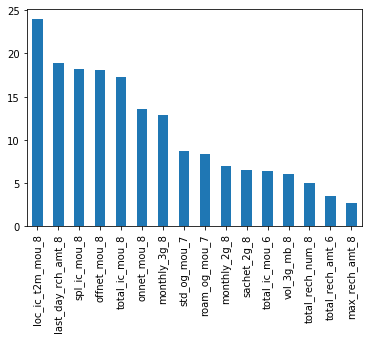

In [199]:
c.plot.bar()

Looks like the top 5 features are loc_ic_t2m_mou_8, last_day_rch_amt_8, spl_ic_mou_8, offnet_mou_8, and total_ic_mou_8. And these features are all related to month 8

## Recommendation

Incoming calls traffic, last day recharge amount and call interactions outside of the T network have a significant influence on the churn. The coefficients to these parameters are negative, which means that the higher the value for these parameters, the more probable that the churn prediction will be 0. 

In other words, customers with higher incoming call activity, high last day recharge amount and interactions outside of T network are less likely to churn. The inverse of this applies to customers who are likely to churn out